In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [98]:
%cd /content/gdrive/MyDrive/CSE 534 - Fall 2021/PROJECT/ChordDNS-master/data

/content/gdrive/MyDrive/CSE 534 - Fall 2021/PROJECT/ChordDNS-master/data


In [4]:
!pip install dnspython

     |████████████████████████████████| 241 kB 4.2 MB/s 


In [99]:
import pandas as pd
import os
import sys
import dns
import dns.resolver
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('data_mapping.txt', header=None).reset_index(drop=True)
answer_lookup = []
for i in range(0, len(df.head(1000))):
    website = df.iloc[i][0].split(' ')[0]
    start = time.time()
    try:
        result = dns.resolver.resolve(website, 'A')
    except (dns.resolver.NXDOMAIN,dns.resolver.NoAnswer, dns.resolver.Timeout):
        continue
    end = time.time()
    answer_lookup.append((website, (end - start)*1000))
    print(answer_lookup[-1])    

('google.com', 6.084918975830078)
('youtube.com', 5.356311798095703)
('facebook.com', 107.57756233215332)
('baidu.com', 3.7233829498291016)
('wikipedia.org', 3.107786178588867)
('yahoo.com', 109.56811904907227)
('google.co.in', 3.7469863891601562)
('reddit.com', 17.476558685302734)
('qq.com', 26.14903450012207)
('amazon.com', 7.432460784912109)
('taobao.com', 27.622461318969727)
('twitter.com', 4.068851470947266)
('tmall.com', 58.9146614074707)
('google.co.jp', 3.72314453125)
('live.com', 17.674684524536133)
('vk.com', 561.9068145751953)
('instagram.com', 17.723798751831055)
('sohu.com', 3.7848949432373047)
('sina.com.cn', 22.8731632232666)
('jd.com', 57.55043029785156)
('weibo.com', 23.20384979248047)
('360.cn', 3.3416748046875)
('google.de', 4.310369491577148)
('google.co.uk', 3.7865638732910156)
('linkedin.com', 17.77172088623047)
('google.com.br', 288.16771507263184)
('google.fr', 4.602193832397461)
('google.ru', 4.419088363647461)
('yandex.ru', 249.85003471374512)
('netflix.com', 

In [ ]:
!ls -lrt

In [101]:
df

,index,website,lookup_time
0,0,google.com,6.084919
1,1,youtube.com,5.356312
2,2,facebook.com,107.577562
3,3,baidu.com,3.723383
4,4,wikipedia.org,3.107786
...,...,...,...
987,987,change.org,74.783564
988,988,gazeta.ru,290.996075
989,989,fotostrana.ru,558.194637
990,990,1fichier.com,515.199661


([<matplotlib.axis.XTick at 0x7f1d6f838d90>,
 <a list of 10 Text major ticklabel objects>)

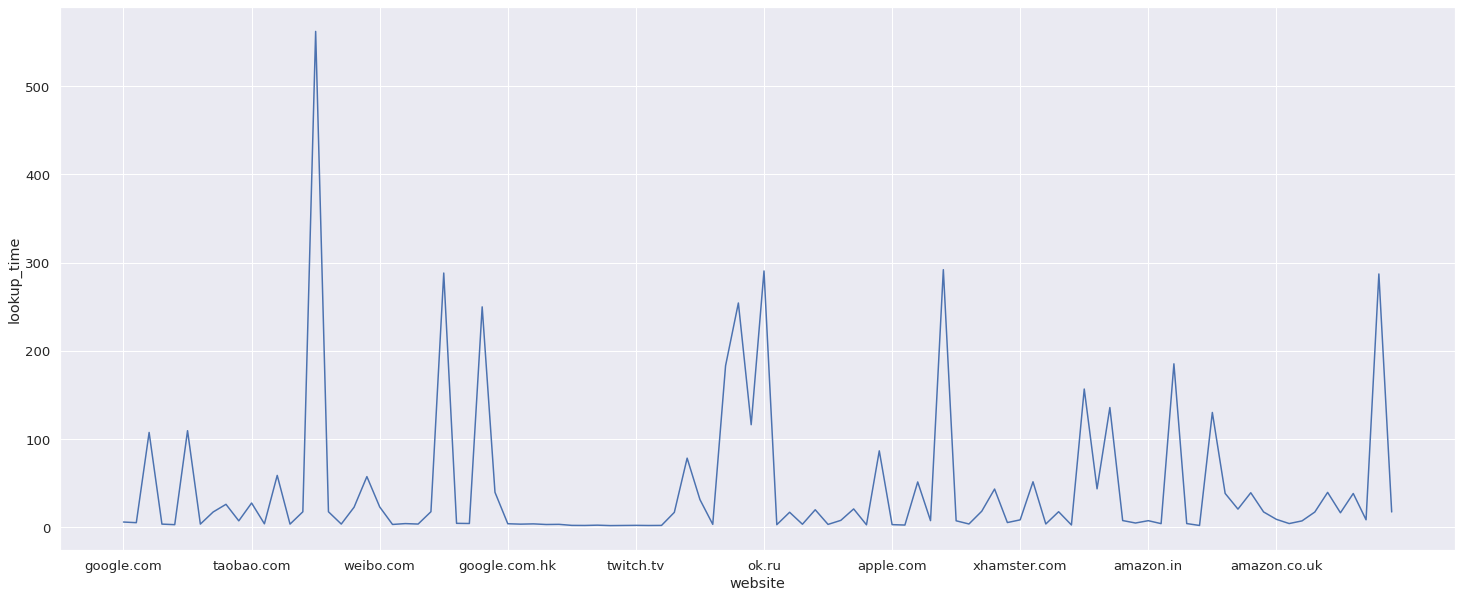

In [39]:
plt.figure(figsize=(25,10))
sns.lineplot(x="website", y="lookup_time", data=df.head(100))
plt.xticks(range(0, int(100),10))

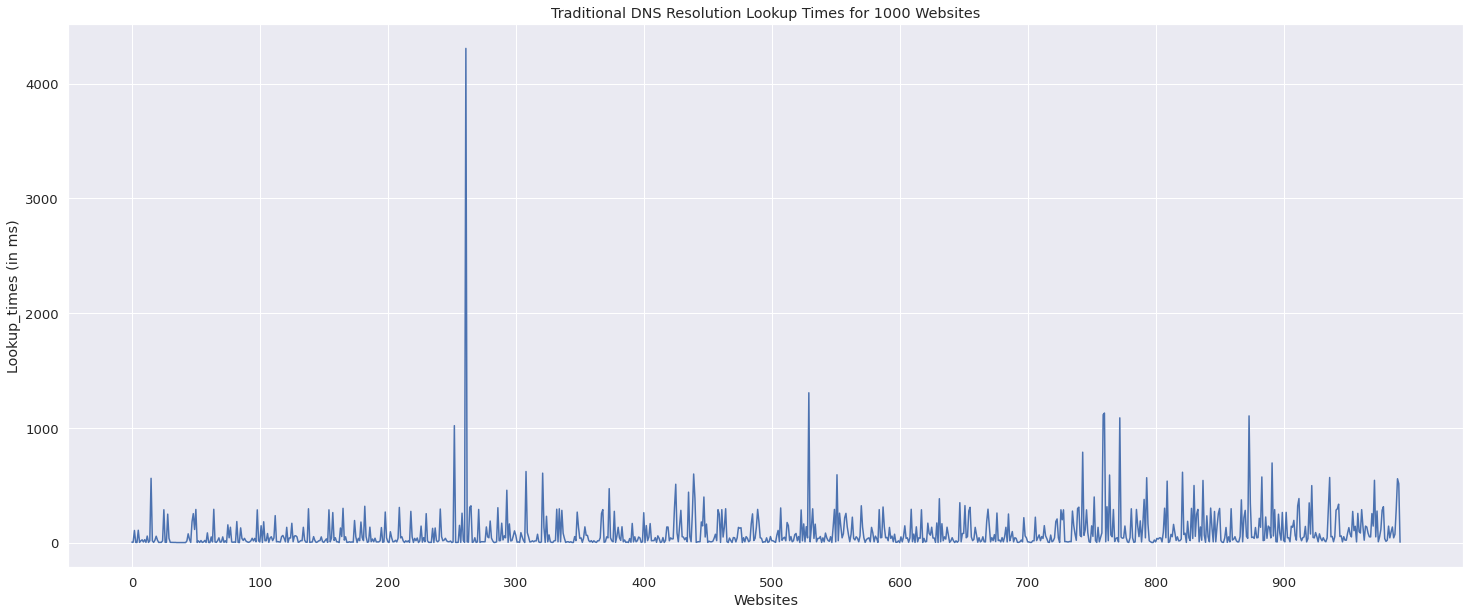

In [14]:
df = pd.DataFrame(answer_lookup, columns = ['website','lookup_time'])
df = df.reset_index()
plt.figure(figsize=(25,10))
sns.set(font_scale = 1.2)
plot = sns.lineplot(x="index", y="lookup_time", data=df)
plot.set(xlabel="Websites", ylabel = "Lookup_times (in ms)")
plot.set_title("Traditional DNS Resolution Lookup Times for 1000 Websites")
plot.set_xticks(range(0, int(1000),100))


In [ ]:
!ls -lrt

* **Fetching DNS hop count from output file (m=128)**




In [118]:
!grep -i "website" "FCN_Proj_log_128.txt"  | cut -d ' ' -f6,13   > "chord_dns_hop_count_128.csv"

In [119]:
chord_df_hop_128 = pd.read_csv("chord_dns_hop_count_128.csv", header = None, names = ['website','hop_count']).reset_index()

In [120]:
chord_df_hop_128

,index,website,hop_count
0,0,google.com,4
1,1,youtube.com,4
2,2,facebook.com,4
3,3,baidu.com,4
4,4,wikipedia.org,6
...,...,...,...
995,995,change.org,5
996,996,gazeta.ru,4
997,997,fotostrana.ru,5
998,998,1fichier.com,3


* **Fetching DNS hop count from output file (m=256)**


In [116]:
!grep -i "website" "FCN_Proj_log_256.txt"  | cut -d ' ' -f6,13   > "chord_dns_hop_count_256.csv"

chord_df_hop_256 = pd.read_csv("chord_dns_hop_count_256.csv", header = None, names = ['website','hop_count']).reset_index()

chord_df_hop_256

,index,website,hop_count
0,0,google.com,6
1,1,youtube.com,5
2,2,facebook.com,5
3,3,baidu.com,5
4,4,wikipedia.org,3
...,...,...,...
995,995,change.org,6
996,996,gazeta.ru,3
997,997,fotostrana.ru,6
998,998,1fichier.com,5


* **Fetching DNS hop count from output file (m=64)**


---



In [105]:
!grep -i "website" "FCN_Proj_log.txt"  | cut -d ' ' -f6,13   > "chord_dns_hop_count_64.csv"

In [113]:
chord_df_hop_64 = pd.read_csv("chord_dns_hop_count_64.csv", header = None, names = ['website','hop_count']).reset_index()

In [114]:
chord_df_hop_64

,index,website,hop_count
0,0,google.com,4
1,1,youtube.com,5
2,2,facebook.com,4
3,3,baidu.com,5
4,4,wikipedia.org,6
...,...,...,...
995,995,change.org,5
996,996,gazeta.ru,4
997,997,fotostrana.ru,5
998,998,1fichier.com,5


* **Fetching DNS lookup times from output file (m=128)**




In [111]:
!grep -i "website" "FCN_Proj_log_128.txt" | cut -d ':' -f6,7,8   | cut -d ',' -f1,2  | cut -d ' ' -f4,7 > "chord_dns_lookup_times_128.csv"

In [112]:
chord_df_128 = pd.read_csv("chord_dns_lookup_times_128.csv", header = None, names = ['website','lookup_time']).reset_index()

In [115]:
chord_df_128

,index,website,lookup_time
0,0,google.com,9
1,1,youtube.com,9
2,2,facebook.com,8
3,3,baidu.com,7
4,4,wikipedia.org,8
...,...,...,...
995,995,change.org,3
996,996,gazeta.ru,3
997,997,fotostrana.ru,4
998,998,1fichier.com,3


* **Fetching DNS lookup times from output file (m=64)**




In [110]:
!grep -i "website" "FCN_Proj_log.txt" | cut -d ':' -f6,7,8   | cut -d ',' -f1,2  | cut -d ' ' -f4,7 > "chord_dns_lookup_times.csv"

In [176]:
chord_df = pd.read_csv("chord_dns_lookup_times.csv", header = None, names = ['website','lookup_time']).reset_index()

In [182]:
chord_df

,index,website,lookup_time
0,0,google.com,8
1,1,youtube.com,10
2,2,facebook.com,8
3,3,baidu.com,13
4,4,wikipedia.org,26
...,...,...,...
995,995,change.org,3
996,996,gazeta.ru,3
997,997,fotostrana.ru,3
998,998,1fichier.com,4


In [ ]:
!ls -lrt

In [87]:
!grep -i "website" "FCN_Proj_log_delay.txt" | cut -d ':' -f6,7,8   | cut -d ',' -f1,2  | cut -d ' ' -f4,7 > "chord_dns_lookup_times_delay.csv"
chord_df_delay = pd.read_csv("chord_dns_lookup_times_delay.csv", header = None, names = ['website','lookup_time']).reset_index()
chord_df_delay.head(50)

,index,website,lookup_time
0,0,google.com,72
1,1,youtube.com,70
2,2,facebook.com,84
3,3,baidu.com,75
4,4,wikipedia.org,70
5,5,yahoo.com,50
6,6,google.co.in,53
7,7,reddit.com,55
8,8,qq.com,57
9,9,amazon.com,44


In [ ]:
count = 0
for i in range(0, len(chord_df)):
  #print(type(chord_df.iloc[106][2]))
  if not isinstance(chord_df.iloc[i][2], float):
    print(chord_df.iloc[i][0], chord_df.iloc[i][2])
    count+=1
print(count) 

In [189]:
df.lookup_time.max()

1566.6522979736328

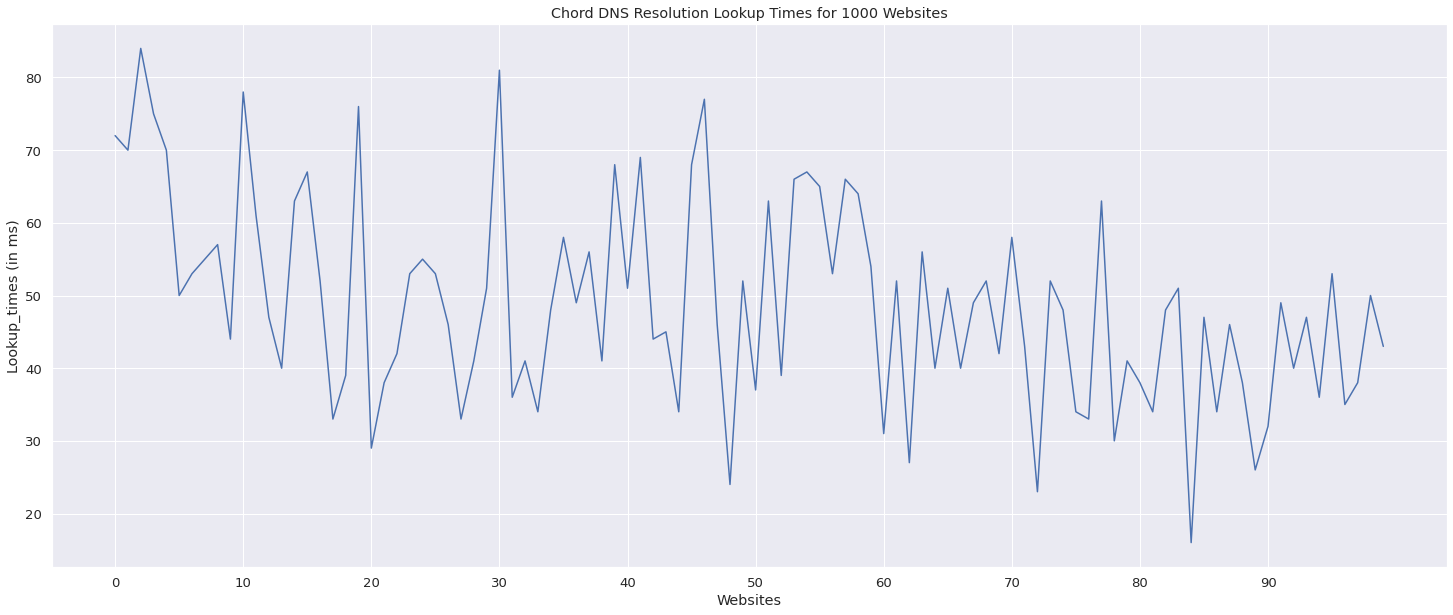

In [97]:
plt.figure(figsize=(25,10))
sns.set(font_scale = 1.2)
plot = sns.lineplot(x="index", y="lookup_time", data=chord_df_delay.head(100))
plot.set(xlabel="Websites", ylabel = "Lookup_times (in ms)")
plot.set_title("Chord DNS Resolution Lookup Times for 1000 Websites")
plot.set_xticks(range(0, int(100),10))
#plot.set_yticks(range(0, int(chord_df.lookup_time.max())))

**PLOT 1 a : Traditional DNS Vs Chord DNS lookup comparisons for 1000 websites**

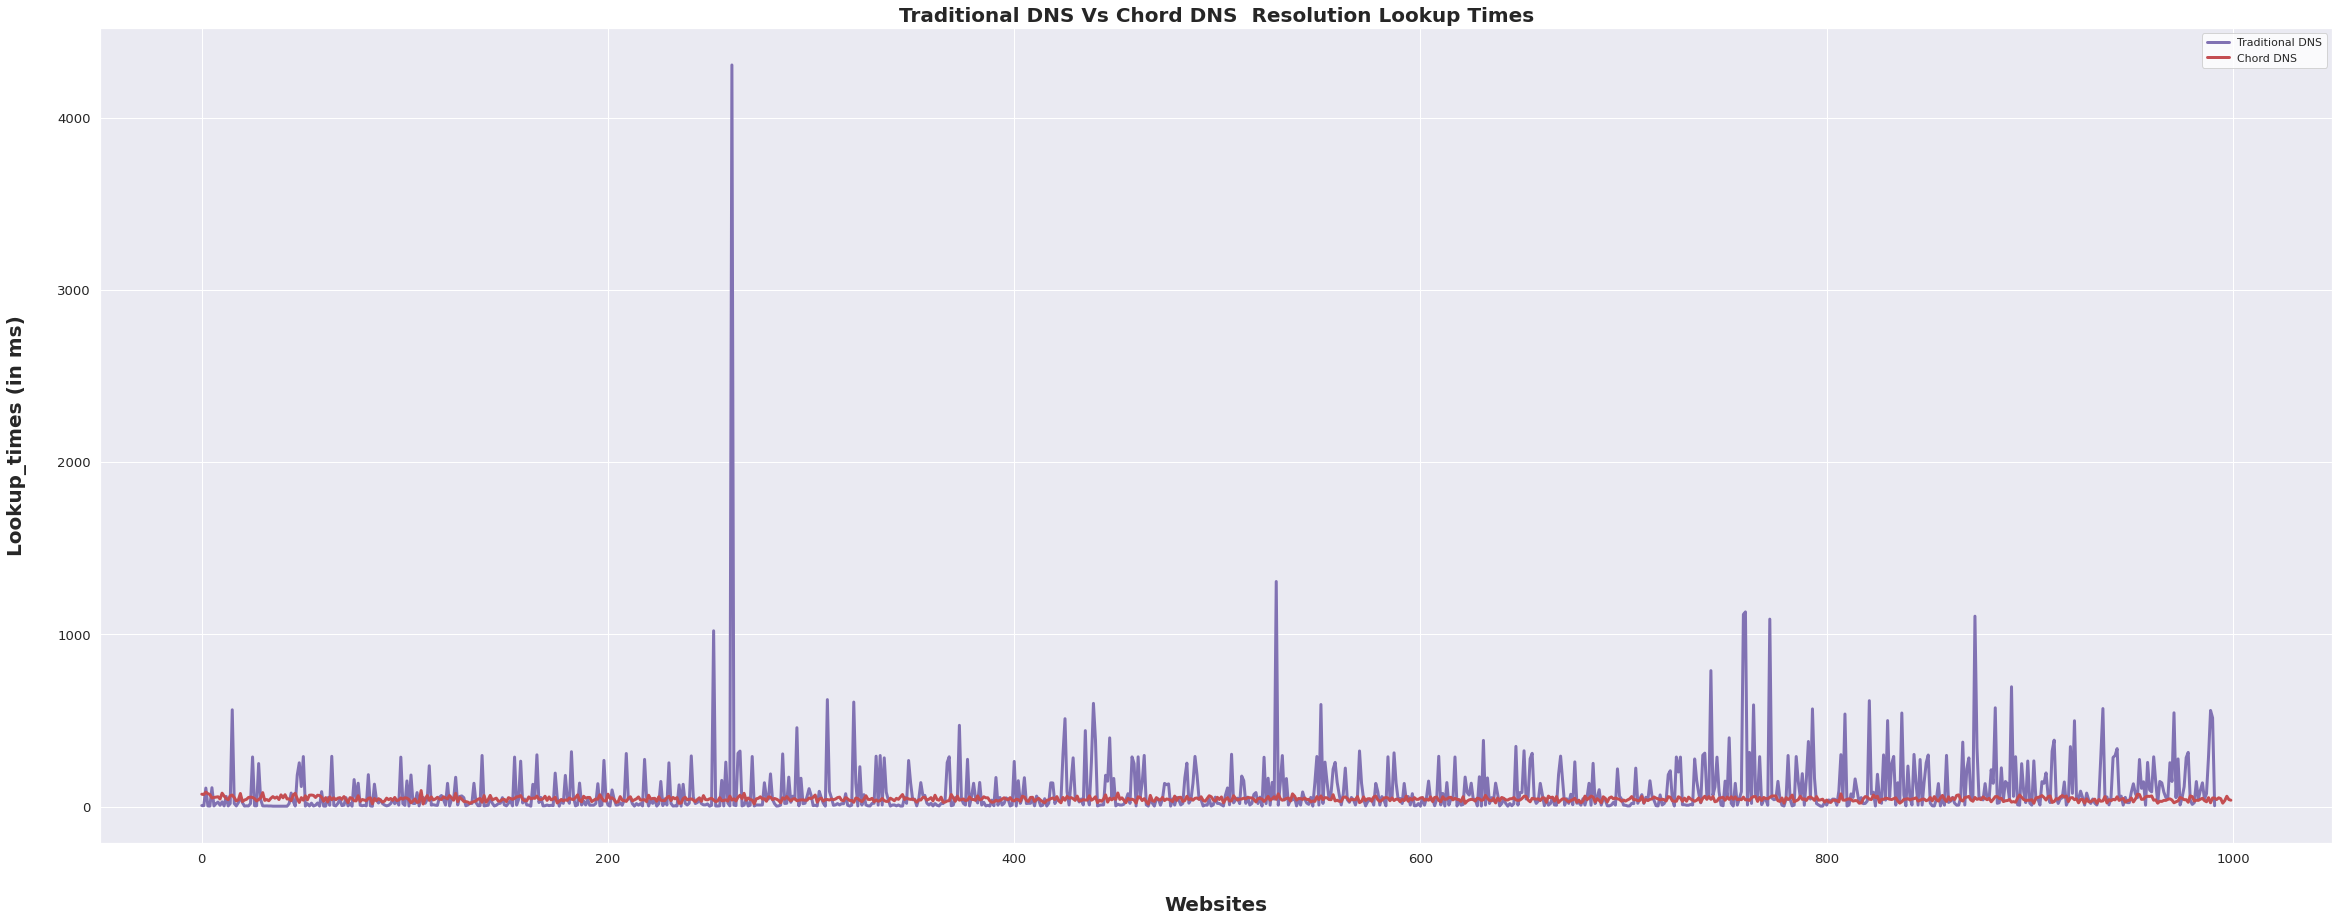

In [89]:
plt.figure(figsize=(40,15))

plt.plot(df['lookup_time'], color = 'm', label = 'Traditional DNS' ,linewidth=3.0)
plt.plot(chord_df_delay['lookup_time'], color = 'r', label = 'Chord DNS',linewidth=3.0)

plt.xlabel("Websites",labelpad=30, weight='bold', size=20)
plt.ylabel("Lookup_times (in ms)", labelpad=30, weight='bold', size=20)
plt.title("Traditional DNS Vs Chord DNS  Resolution Lookup Times", weight='bold', size=20)

sns.set(style="ticks", rc={"lines.linewidth": 0.7})
plt.legend()
plt.show()

**PLOT 1 b: Traditional DNS vs CHord DNS lookup time comparisons for 100 websites**

In [85]:
import random
random.uniform(0.0001, 0.01)

0.004898702323724185

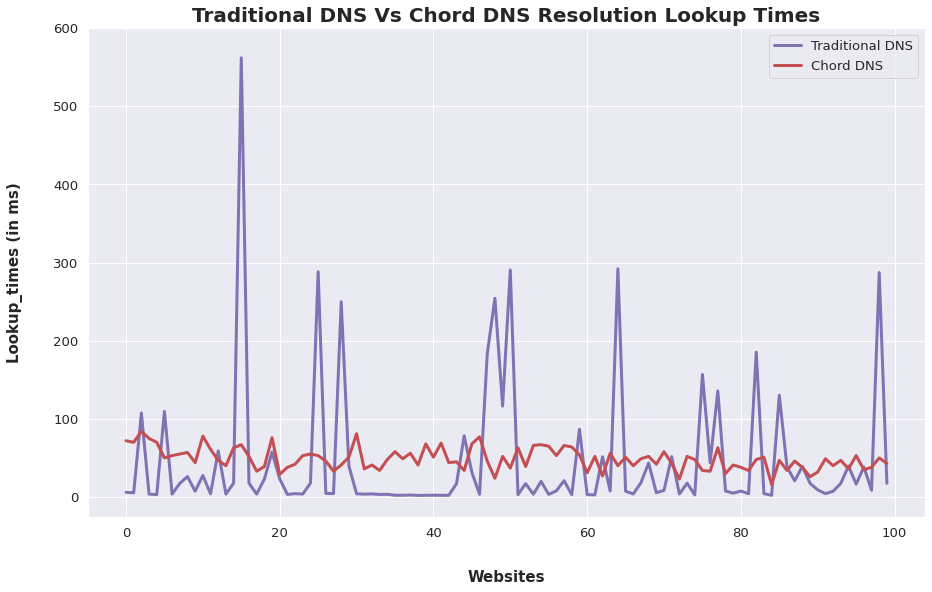

In [102]:
plt.figure(figsize=(15,9))

plt.plot(df['lookup_time'].head(100), color = 'm', label = 'Traditional DNS' ,linewidth=3.0)
plt.plot(chord_df_delay['lookup_time'].head(100), color = 'r', label = 'Chord DNS',linewidth=3.0)

plt.xlabel("Websites",labelpad=30, weight='bold', size=15)
plt.ylabel("Lookup_times (in ms)", labelpad=30, weight='bold', size=15)
plt.title("Traditional DNS Vs Chord DNS Resolution Lookup Times", weight='bold', size=20)
plt.yticks(range(0, int(700),100))
plt.legend()
plt.show()

**PLOT 2 a: Comparison of Lookup times on varying finger table size (value of m) for 1000 websites**`

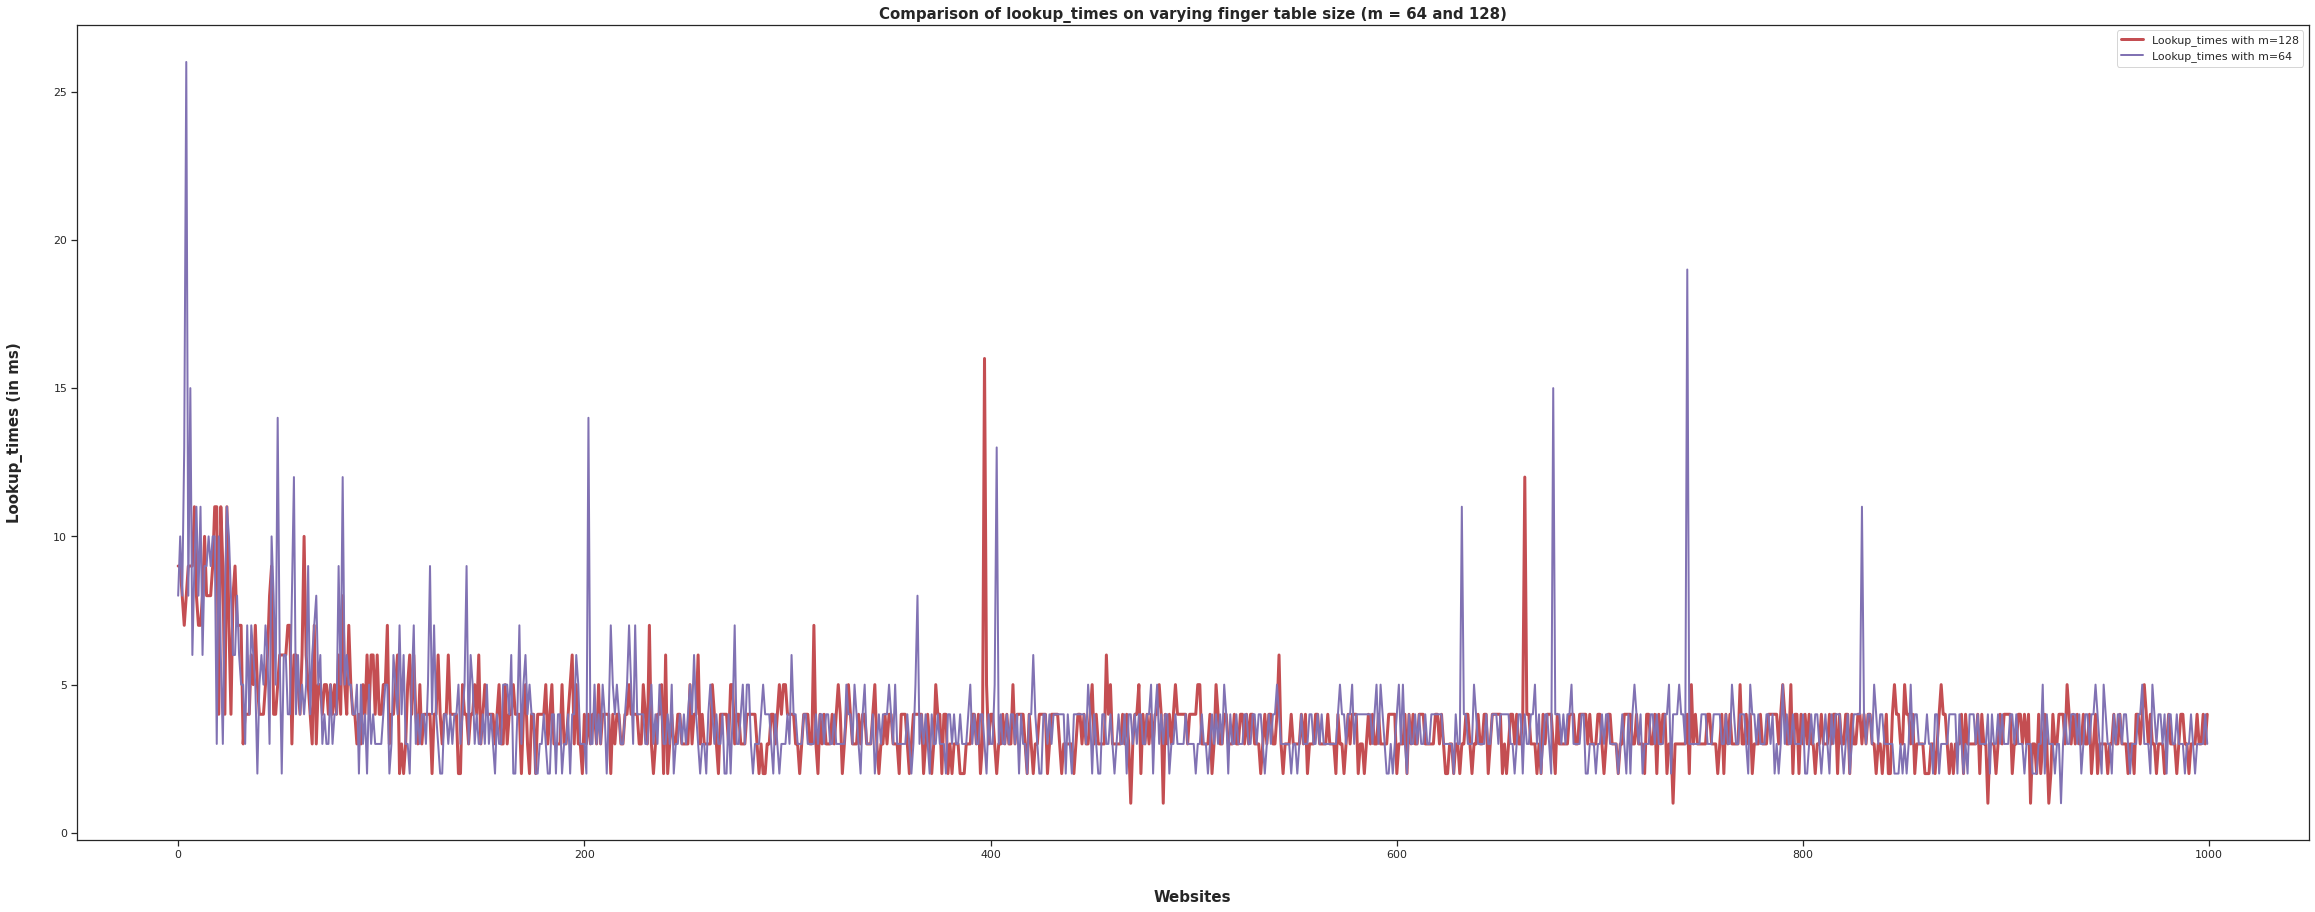

In [339]:
plt.figure(figsize=(40,15))

plt.plot(chord_df_128['lookup_time'], color = 'r', label = 'Lookup_times with m=128' ,linewidth=3.0)
plt.plot(chord_df['lookup_time'], color = 'm', label = 'Lookup_times with m=64',linewidth=2.0)

plt.xlabel("Websites",labelpad=30, weight='bold', size=15)
plt.ylabel("Lookup_times (in ms)", labelpad=30, weight='bold', size=15)
plt.title("Comparison of lookup_times on varying finger table size (m = 64 and 128)", weight='bold', size=15)

sns.set(style="ticks", rc={"lines.linewidth": 0.7})
plt.legend()
plt.show()

**PLOT 2 b: Comparison of Lookup times on varying finger table size (value of m) for 100 websites**

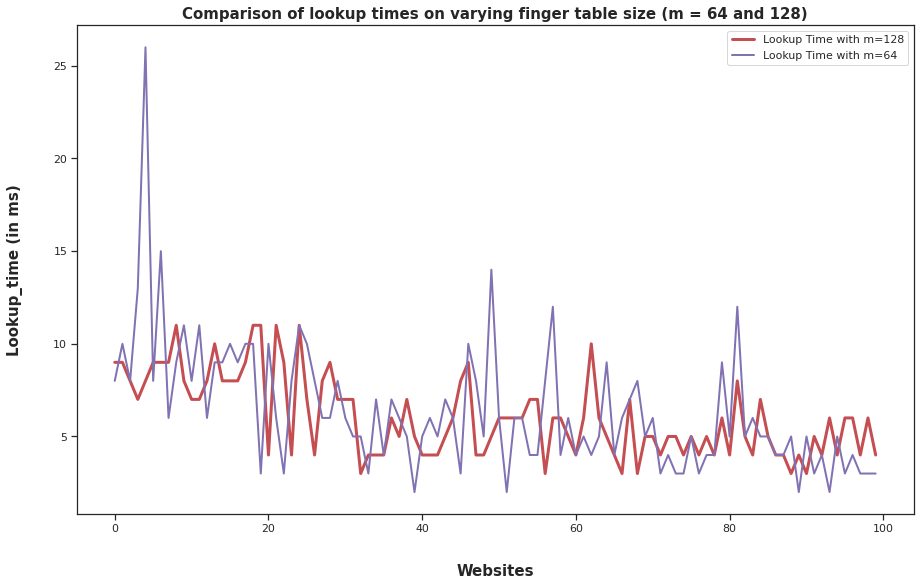

In [338]:
plt.figure(figsize=(15,9))

plt.plot(chord_df_128['lookup_time'].head(100), color = 'r', label = 'Lookup Time with m=128' ,linewidth=3.0)
plt.plot(chord_df['lookup_time'].head(100), color = 'm', label = 'Lookup Time with m=64',linewidth=2.0)

plt.xlabel("Websites",labelpad=30, weight='bold', size=15)
plt.ylabel("Lookup_time (in ms)", labelpad=30, weight='bold', size=15)
plt.title("Comparison of lookup times on varying finger table size (m = 64 and 128)", weight='bold', size=15)

sns.set(style="ticks", rc={"lines.linewidth": 0.7})
plt.legend()
plt.show()

**Hop Count Variation based on finger table size (m=64, 128)**

In [108]:
import numpy as np

hc_64 = np.mean(chord_df_hop_64['hop_count'])

print("Average hop count for m=64 : {0}".format(hc_64))

Average hop count for m=64 : 4.629


In [121]:
import numpy as np
hc_256 = np.mean(chord_df_hop_256['hop_count'])
hc_128 = np.mean(chord_df_hop_128['hop_count'])
hc_64 = np.mean(chord_df_hop_64['hop_count'])
print("Average hop count for m=256 : {0}".format(hc_256))
print("Average hop count for m=128 : {0}".format(hc_128))
print("Average hop count for m=64 : {0}".format(hc_64))

Average hop count for m=256 : 4.76
Average hop count for m=128 : 4.686
Average hop count for m=64 : 4.629


**PLOT 3 a: Bar Plot Comparison of Hop Count on varying finger table size (value of m) for 100 websites**

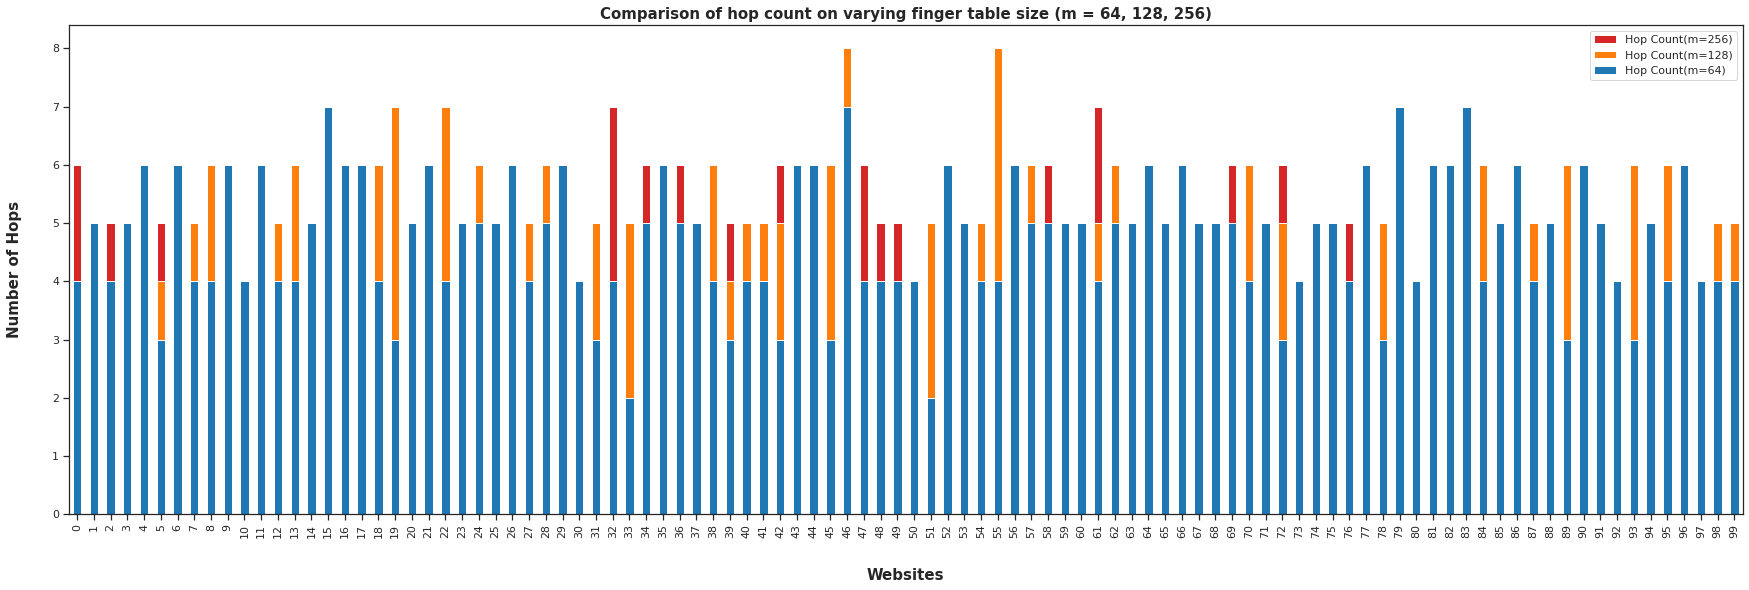

In [345]:
plt.figure(figsize=(30,9))

chord_df_hop_256['hop_count'].head(100).plot.bar(color = ['#d62728'], label = 'Hop Count(m=256)')
chord_df_hop_128['hop_count'].head(100).plot.bar(color = ['#ff7f0e'], label = 'Hop Count(m=128)')
chord_df_hop_64['hop_count'].head(100).plot.bar(color = ['#1f77b4'], label = 'Hop Count(m=64)') #, height = 100) #, color = 'r', label = 'Hop Count with m=64' ,linewidth=3.0)
plt.title("Comparison of hop count on varying finger table size (m = 64, 128, 256)", weight='bold', size=15)
plt.xlabel("Websites",labelpad=30, weight='bold', size=15)
plt.ylabel("Number of Hops", labelpad=30, weight='bold', size=15)
plt.legend()

**PLOT 3 b: Line Plot Comparison of Hop Count on varying finger table size (value of m) for 100 websites**

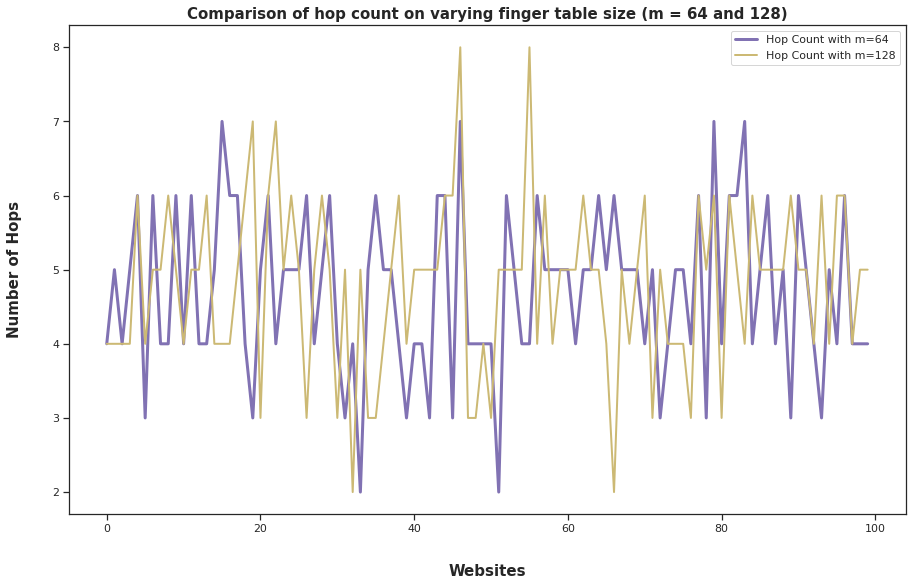

In [437]:
plt.figure(figsize=(15,9))

plt.plot(chord_df_hop_64['hop_count'].head(100), color = 'm', label = 'Hop Count with m=64' ,linewidth=3.0)
plt.plot(chord_df_hop_128['hop_count'].head(100), color = 'y', label = 'Hop Count with m=128',linewidth=2.0)


plt.xlabel("Websites",labelpad=30, weight='bold', size=15)
plt.ylabel("Number of Hops", labelpad=30, weight='bold', size=15)
plt.title("Comparison of hop count on varying finger table size (m = 64 and 128)", weight='bold', size=15)

sns.set(style="ticks", rc={"lines.linewidth": 0.7})
plt.legend()
plt.show()

In [ ]:
!ls -rlt

* **Fetching DNS lookup times from output file (m=64)**


---



In [415]:
!grep -i "website" "FCN_Proj_log_100_nodes.txt"  | cut -d ':' -f6,7,8   | cut -d ',' -f1,2  | cut -d ' ' -f4,7  > "chord_dns_lookup_times_100_nodes.csv"

In [416]:
chord_df_100_nodes = pd.read_csv("chord_dns_lookup_times_100_nodes.csv", header = None, names = ['website','lookup_time']).reset_index()
chord_df_100_nodes

,index,website,lookup_time
0,0,google.com,56
1,1,youtube.com,38
2,2,facebook.com,51
3,3,baidu.com,44
4,4,wikipedia.org,22
...,...,...,...
995,995,change.org,9
996,996,gazeta.ru,15
997,997,fotostrana.ru,10
998,998,1fichier.com,9


In [ ]:
!ls -lrt 

In [422]:
!grep -i "website" "FCN_Proj_log_200_nodes.txt"  | cut -d ':' -f6,7,8   | cut -d ',' -f1,2  | cut -d ' ' -f4,7  > "chord_dns_lookup_times_200_nodes.csv"
chord_df_200_nodes = pd.read_csv("chord_dns_lookup_times_200_nodes.csv", header = None, names = ['website','lookup_time']).reset_index()
chord_df_200_nodes

,index,website,lookup_time
0,0,google.com,41
1,1,youtube.com,32
2,2,facebook.com,39
3,3,baidu.com,54
4,4,wikipedia.org,33
...,...,...,...
995,995,change.org,12
996,996,gazeta.ru,11
997,997,fotostrana.ru,15
998,998,1fichier.com,13


In [ ]:
!ls -lrt

In [428]:
!grep -i "website" "FCN_Proj_log_20_nodes.txt"  | cut -d ':' -f6,7,8   | cut -d ',' -f1,2  | cut -d ' ' -f4,7  > "chord_dns_lookup_times_20_nodes.csv"
chord_df_20_nodes = pd.read_csv("chord_dns_lookup_times_20_nodes.csv", header = None, names = ['website','lookup_time']).reset_index()
chord_df_20_nodes

,index,website,lookup_time
0,0,google.com,31
1,1,youtube.com,16
2,2,facebook.com,34
3,3,baidu.com,38
4,4,wikipedia.org,33
...,...,...,...
995,995,change.org,11
996,996,gazeta.ru,11
997,997,fotostrana.ru,12
998,998,1fichier.com,10


**PLOT 4 a: Comparison of Lookup times on varying node size (value of N) for 1000 websites**

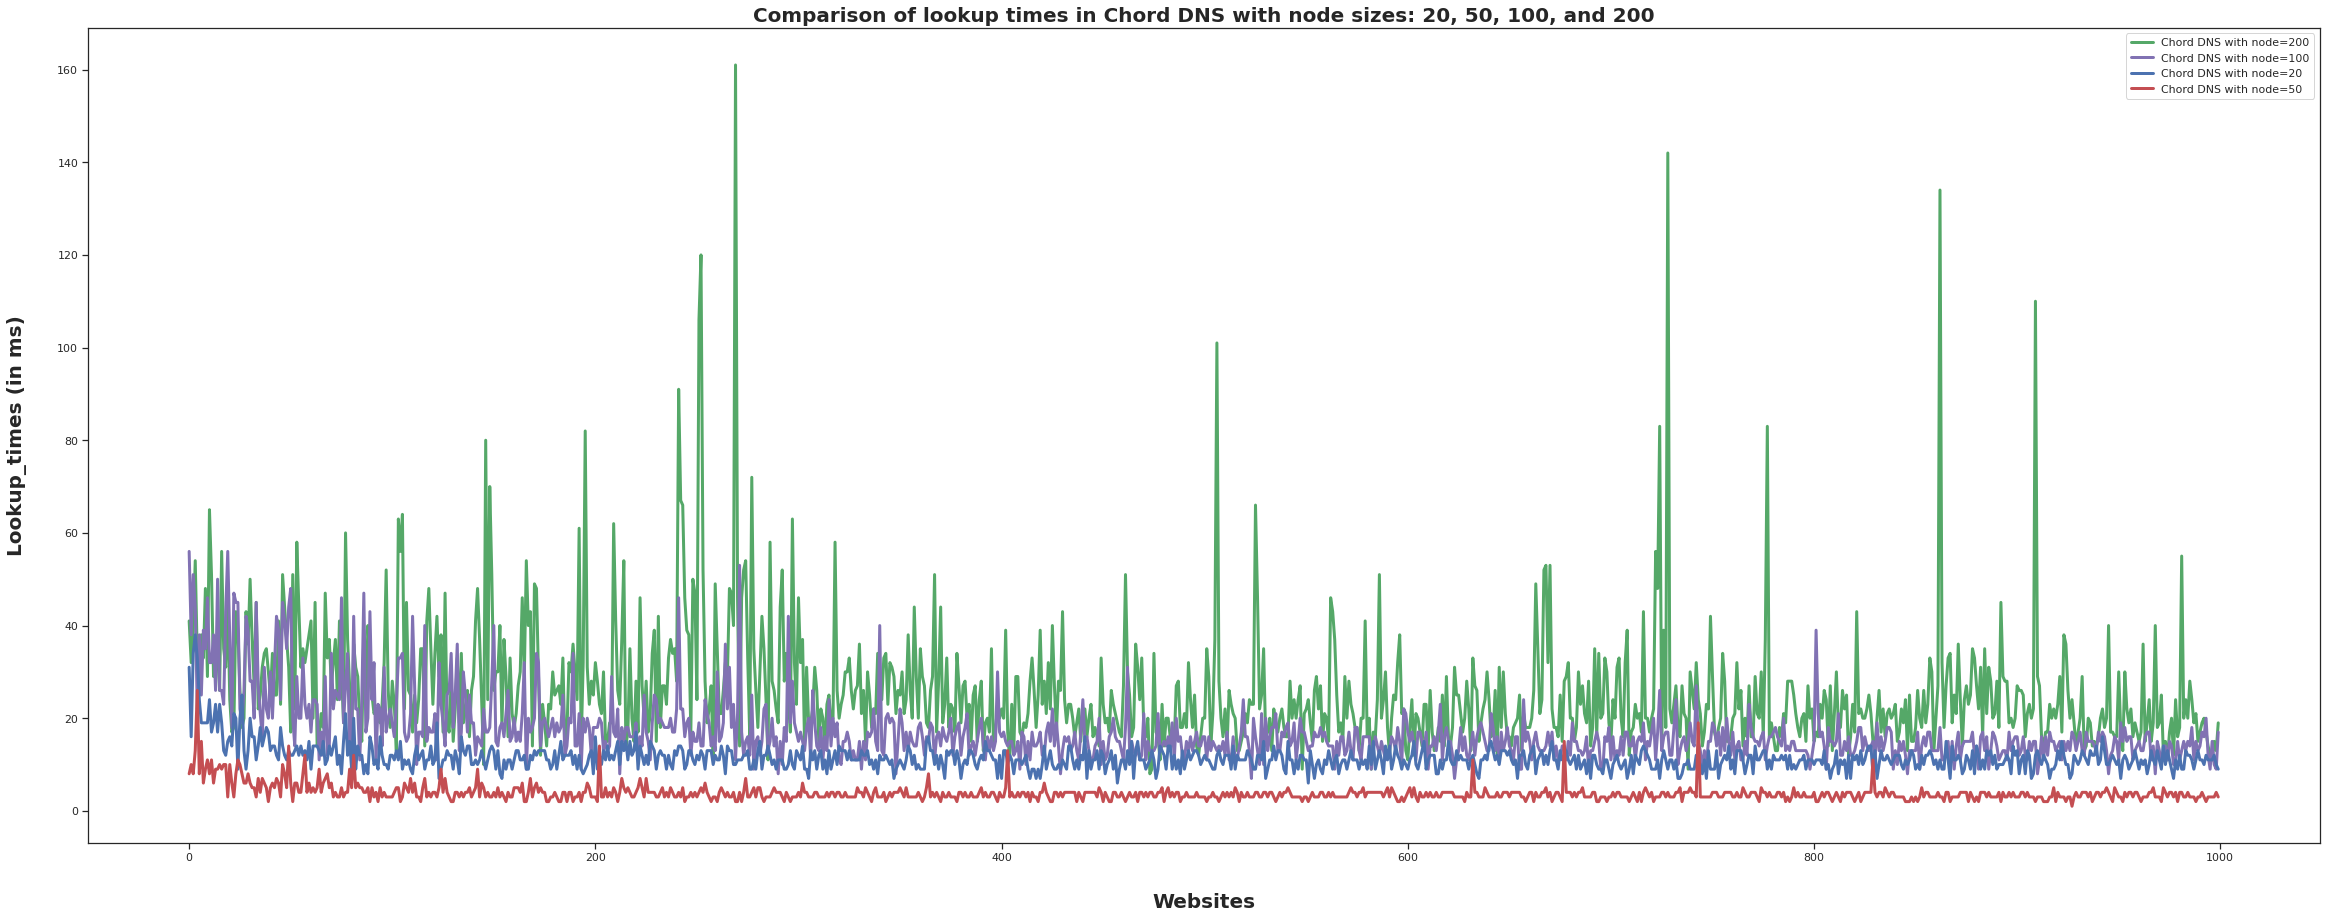

In [510]:
plt.figure(figsize=(40,15))

plt.plot(chord_df_200_nodes['lookup_time'], color = 'g', label = 'Chord DNS with node=200' ,linewidth=3.0)
plt.plot(chord_df_100_nodes['lookup_time'], color = 'm', label = 'Chord DNS with node=100' ,linewidth=3.0)
plt.plot(chord_df_20_nodes['lookup_time'], color = 'b', label = 'Chord DNS with node=20' ,linewidth=3.0)
plt.plot(chord_df['lookup_time'], color = 'r', label = 'Chord DNS with node=50',linewidth=3.0)


plt.xlabel("Websites",labelpad=30, weight='bold', size=20)
plt.ylabel("Lookup_times (in ms)", labelpad=30, weight='bold', size=20)
plt.title("Comparison of lookup times in Chord DNS with node sizes: 20, 50, 100, and 200", weight='bold', size=20)

sns.set(style="ticks", rc={"lines.linewidth": 0.7})
plt.legend()
plt.show()

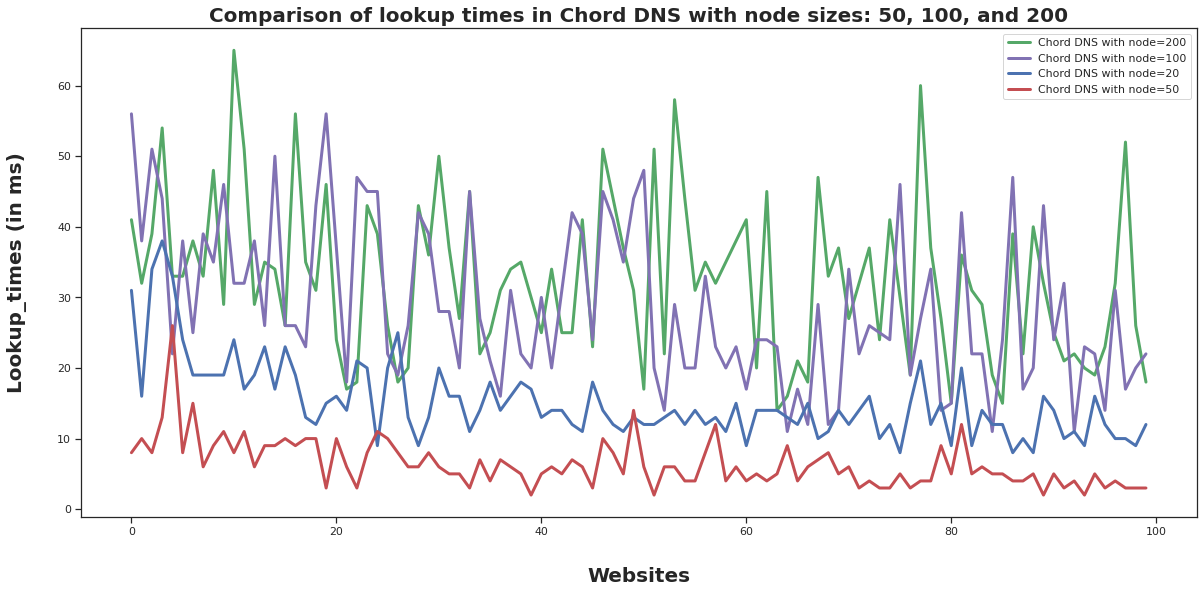

In [511]:
plt.figure(figsize=(20,9))

plt.plot(chord_df_200_nodes['lookup_time'].head(100), color = 'g', label = 'Chord DNS with node=200' ,linewidth=3.0)
plt.plot(chord_df_100_nodes['lookup_time'].head(100), color = 'm', label = 'Chord DNS with node=100' ,linewidth=3.0)
plt.plot(chord_df_20_nodes['lookup_time'].head(100), color = 'b', label = 'Chord DNS with node=20' ,linewidth=3.0)
plt.plot(chord_df['lookup_time'].head(100), color = 'r', label = 'Chord DNS with node=50',linewidth=3.0)


plt.xlabel("Websites",labelpad=30, weight='bold', size=20)
plt.ylabel("Lookup_times (in ms)", labelpad=30, weight='bold', size=20)
plt.title("Comparison of lookup times in Chord DNS with node sizes: 50, 100, and 200", weight='bold', size=20)

sns.set(style="ticks", rc={"lines.linewidth": 0.7})
plt.legend()
plt.show()

In [469]:
!grep -B2 "Trace complete" "final.csv" | grep -v "Trace" | egrep 'ms' >> chord_hop_count_trad_dns.csv

In [470]:
trad_dns_hop_df = pd.read_csv('chord_hop_count_trad_dns.csv', header = None, names = ['hop count'])

In [503]:
hop = []
for i in range(0, len(trad_dns_hop_df)):
  hop.append(int(trad_dns_hop_df.iloc[i][0].lstrip().split(' ')[0]))


hop  = pd.DataFrame(hop, columns = ["hop_count"])

In [504]:
type(hop.iloc[0][0])

numpy.int64

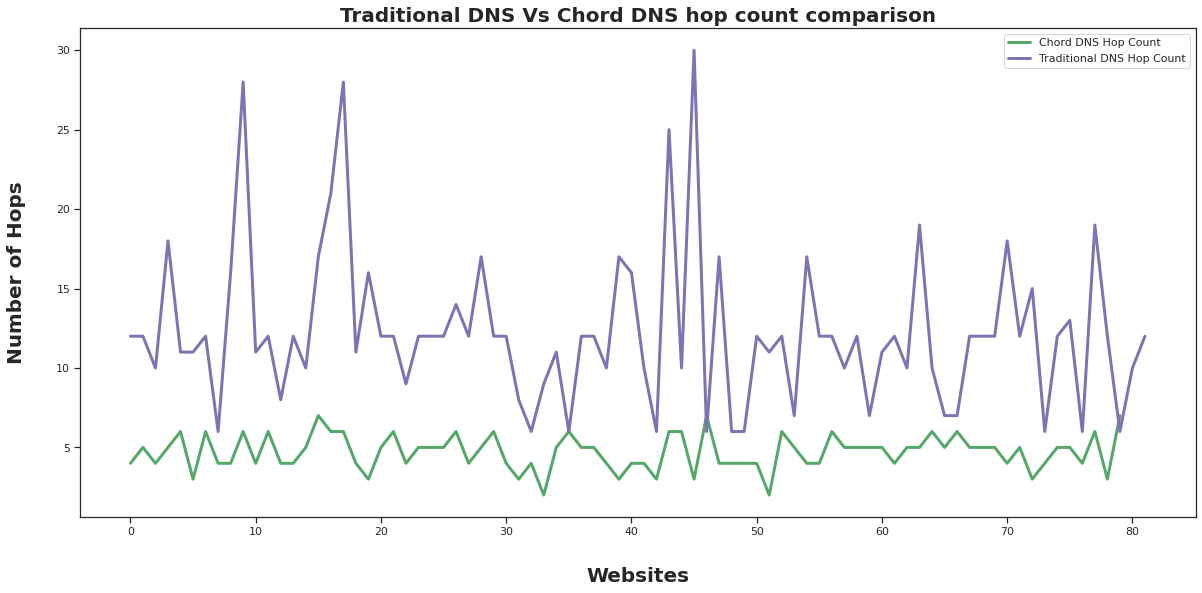

In [509]:
plt.figure(figsize=(20,9))

plt.plot(chord_df_hop_64['hop_count'].head(80), color = 'g', label = 'Chord DNS Hop Count' ,linewidth=3.0)
plt.plot(hop['hop_count'], color = 'm', label = 'Traditional DNS Hop Count' ,linewidth=3.0)


plt.xlabel("Websites",labelpad=30, weight='bold', size=20)
plt.ylabel("Number of Hops", labelpad=30, weight='bold', size=20)
plt.title("Traditional DNS Vs Chord DNS hop count comparison", weight='bold', size=20)
plt.xticks(range(0, int(90),10))
sns.set(style="ticks", rc={"lines.linewidth": 0.7})
plt.legend()
plt.show()

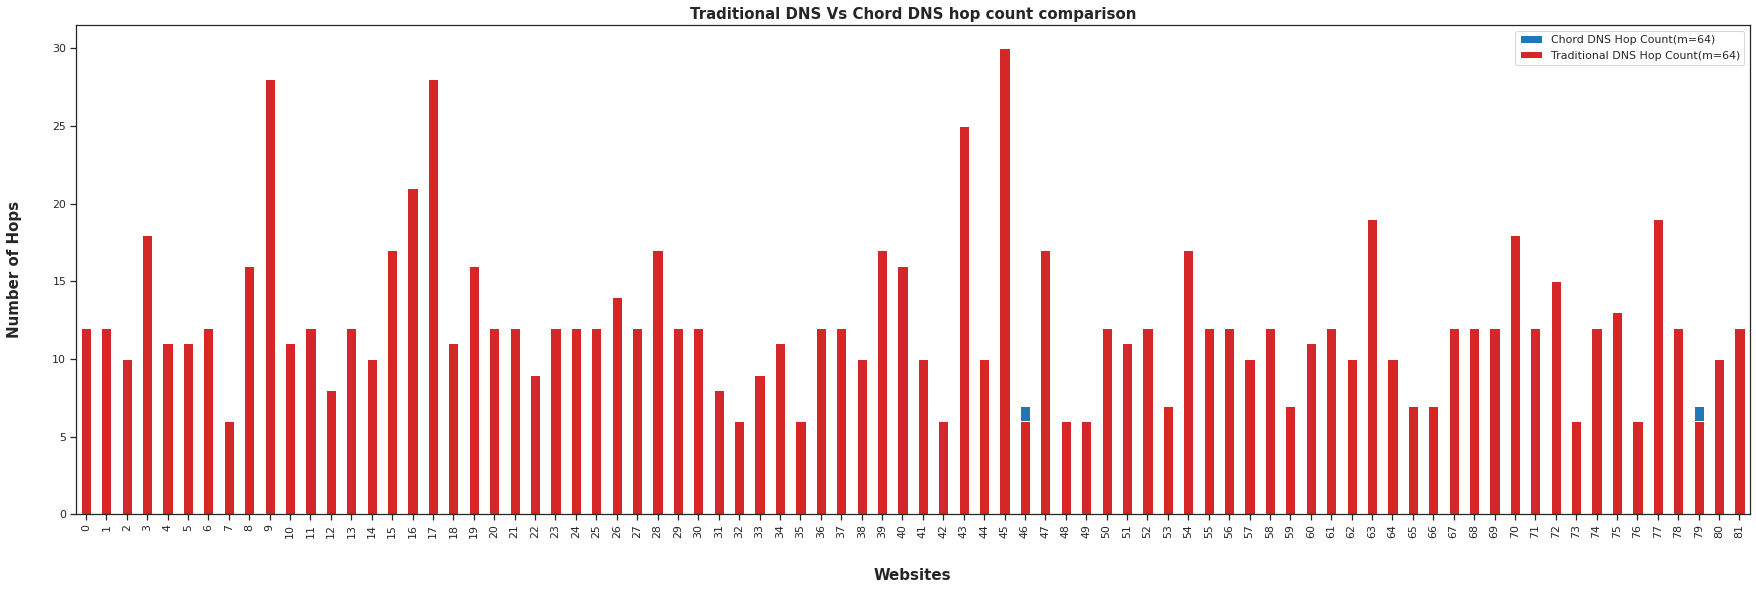

In [506]:
plt.figure(figsize=(30,9))

#chord_df_hop_256['hop_count'].head(100).plot.bar(color = ['#d62728'], label = 'Hop Count(m=256)')
#chord_df_hop_128['hop_count'].head(100).plot.bar(color = ['#ff7f0e'], label = 'Hop Count(m=128)')
chord_df_hop_64['hop_count'].head(100).plot.bar(color = ['#1f77b4'], label = 'Chord DNS Hop Count(m=64)')
hop['hop_count'].plot.bar(color = ['#d62728'], label = 'Traditional DNS Hop Count(m=64)') #, height = 100) #, color = 'r', label = 'Hop Count with m=64' ,linewidth=3.0)
plt.title("Traditional DNS Vs Chord DNS hop count comparison", weight='bold', size=15)
plt.xlabel("Websites",labelpad=30, weight='bold', size=15)
plt.ylabel("Number of Hops", labelpad=30, weight='bold', size=15)
plt.legend()

In [396]:
websites_df = pd.read_csv('data_mapping.txt', header = None, names = ['website'])
w = []
for i in range(0, len(websites_df) - 500):
  w.append(websites_df.iloc[i][0].split(' ')[0])


500

In [405]:
temp  = pd.DataFrame(w)
temp.to_csv('websites.csv')